In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('axes',titlesize=30)
plt.rc('axes',labelsize=30)
plt.rc('font',size=10)
plt.rc('xtick',labelsize=20)
plt.rc('ytick',labelsize=20)
plt.rc('legend',fontsize= 15)
pd.set_option('display.max_row', 50000)
plt.rc('font',family='NanumGothic')
mpl.rcParams['axes.unicode_minus']=False
%config InlineBackend.figure_format='retina'

In [2]:
import folium
import json
from folium import plugins
from folium.features import DivIcon

In [3]:
######## dataset 불러오기
df = pd.read_csv('야놀자!/통합_data/부산통합.csv',sep=',',encoding='utf8')
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1158 entries, 0 to 1157
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          1158 non-null   object 
 1   score         1158 non-null   float64
 2   loc           1158 non-null   object 
 3   lowest_price  1158 non-null   float64
 4   category      1158 non-null   object 
 5   loc2          1158 non-null   object 
 6   SIG_CD        1158 non-null   int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 63.5+ KB


In [5]:
print('부산 숙박업소 개수 : ', len(df))
print('부산 숙밥업소 모텔 개수 : ', (df['category']=='m').sum())
print('부산 숙밥업소 호텔 개수 : ', (df['category']=='h').sum())
print('부산 숙밥업소 팬션 개수 : ', (df['category']=='p').sum())
print('부산 숙밥업소 게스트하우스 개수 : ', (df['category']=='g').sum())

부산 숙박업소 개수 :  1158
부산 숙밥업소 모텔 개수 :  672
부산 숙밥업소 호텔 개수 :  304
부산 숙밥업소 팬션 개수 :  81
부산 숙밥업소 게스트하우스 개수 :  101


In [6]:
total = len(df)
mtotal = (df['category']=='m').sum()
htotal = (df['category']=='h').sum()
ptotal = (df['category']=='p').sum()
gtotal = (df['category']=='g').sum()

In [7]:
### sort
dfc1 = df.sort_values(by=['category'])

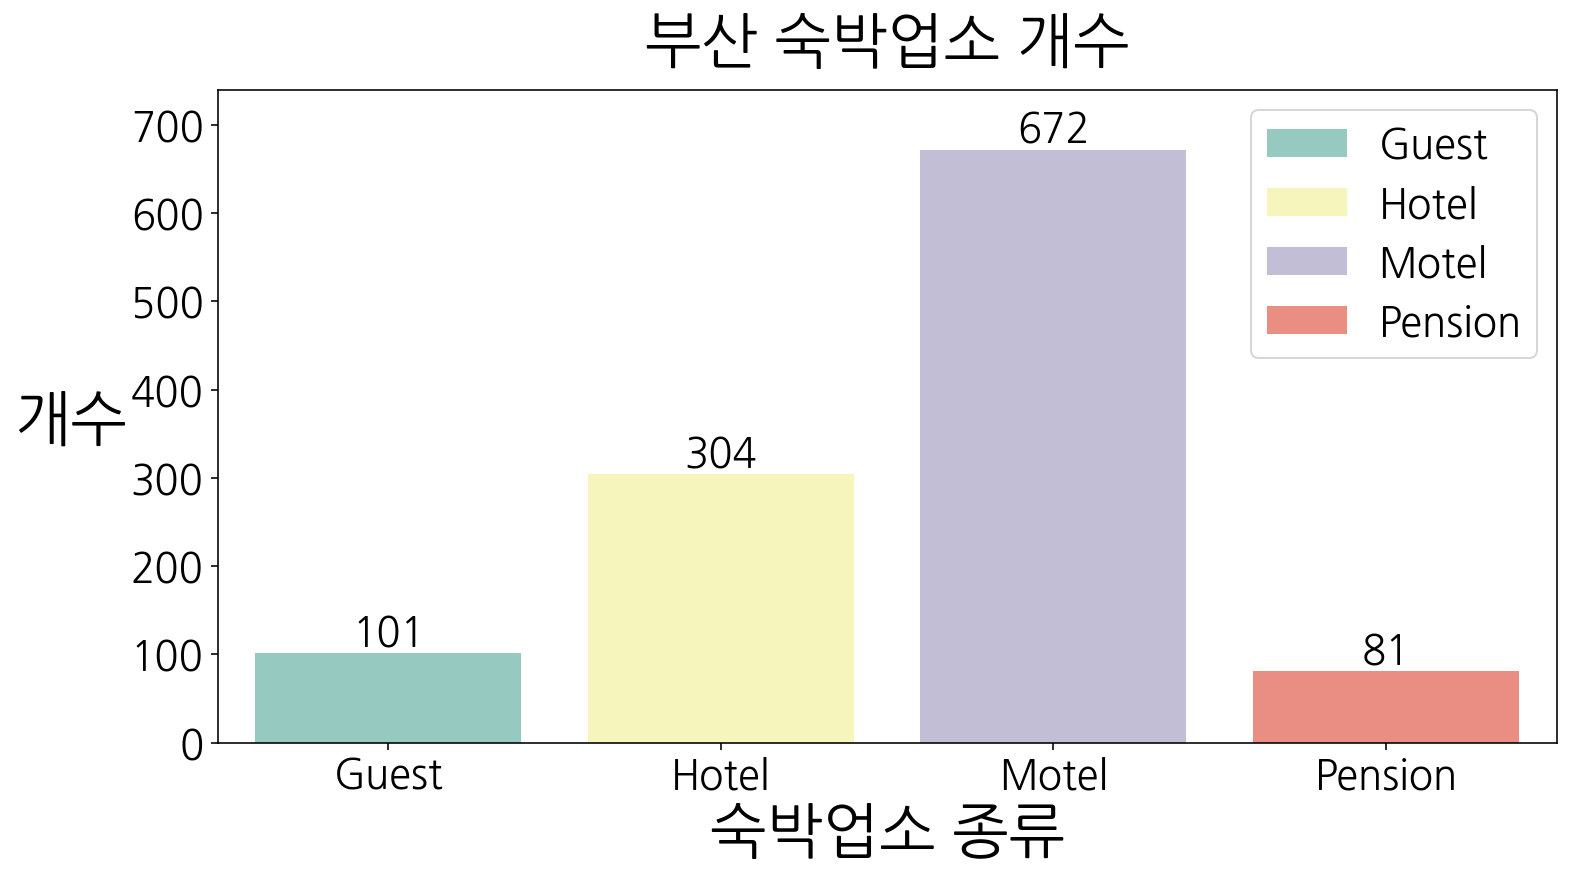

In [9]:
################### 부산 숙박업소 개수 그래프
ax = plt.figure(figsize=(12,6))
ax = sns.countplot(data = dfc1, x='category',hue = 'category',palette='Set3',dodge=False)
ax.set_title('부산 숙박업소 개수',
            pad=15.0)
ax.set_xlabel('숙박업소 종류')
ax.set_xticks([0,1,2,3])
ax.set_xticklabels(['Guest','Hotel','Motel','Pension'])
ax.set_ylabel('개수',rotation=0,labelpad=30,position=(0,0.45,0))
plt.legend(labels=['Guest','Hotel','Motel','Pension'],fontsize=20)
plt.text(0,gtotal,gtotal,fontsize=20,color='black',
             horizontalalignment='center',
             verticalalignment='bottom')
plt.text(1,htotal,htotal,fontsize=20,color='black',
             horizontalalignment='center',
             verticalalignment='bottom')
plt.text(2,mtotal,mtotal,fontsize=20,color='black',
             horizontalalignment='center',
             verticalalignment='bottom')
plt.text(3,ptotal,ptotal,fontsize=20,color='black',
             horizontalalignment='center',
             verticalalignment='bottom')
plt.margins(0.03, 0.1)
#plt.show()
plt.savefig('부산 숙박업소 개수.png',bbox_inches='tight', pad_inches=0.5) 

In [10]:
########### 지도 시각화용 dataset
df2=df.groupby(df['loc2']).mean()
df2.reset_index(level=['loc2'],inplace=True)
df_count=df.groupby('loc2').size()
df_count.reset_index(drop=True,inplace=True)
df2['count']=df_count
df2 = df2.sort_values(by='lowest_price',ascending=False)
df2.reset_index(drop=True,inplace=True)
df2['SIG_CD'] = df2['SIG_CD'].astype(str)

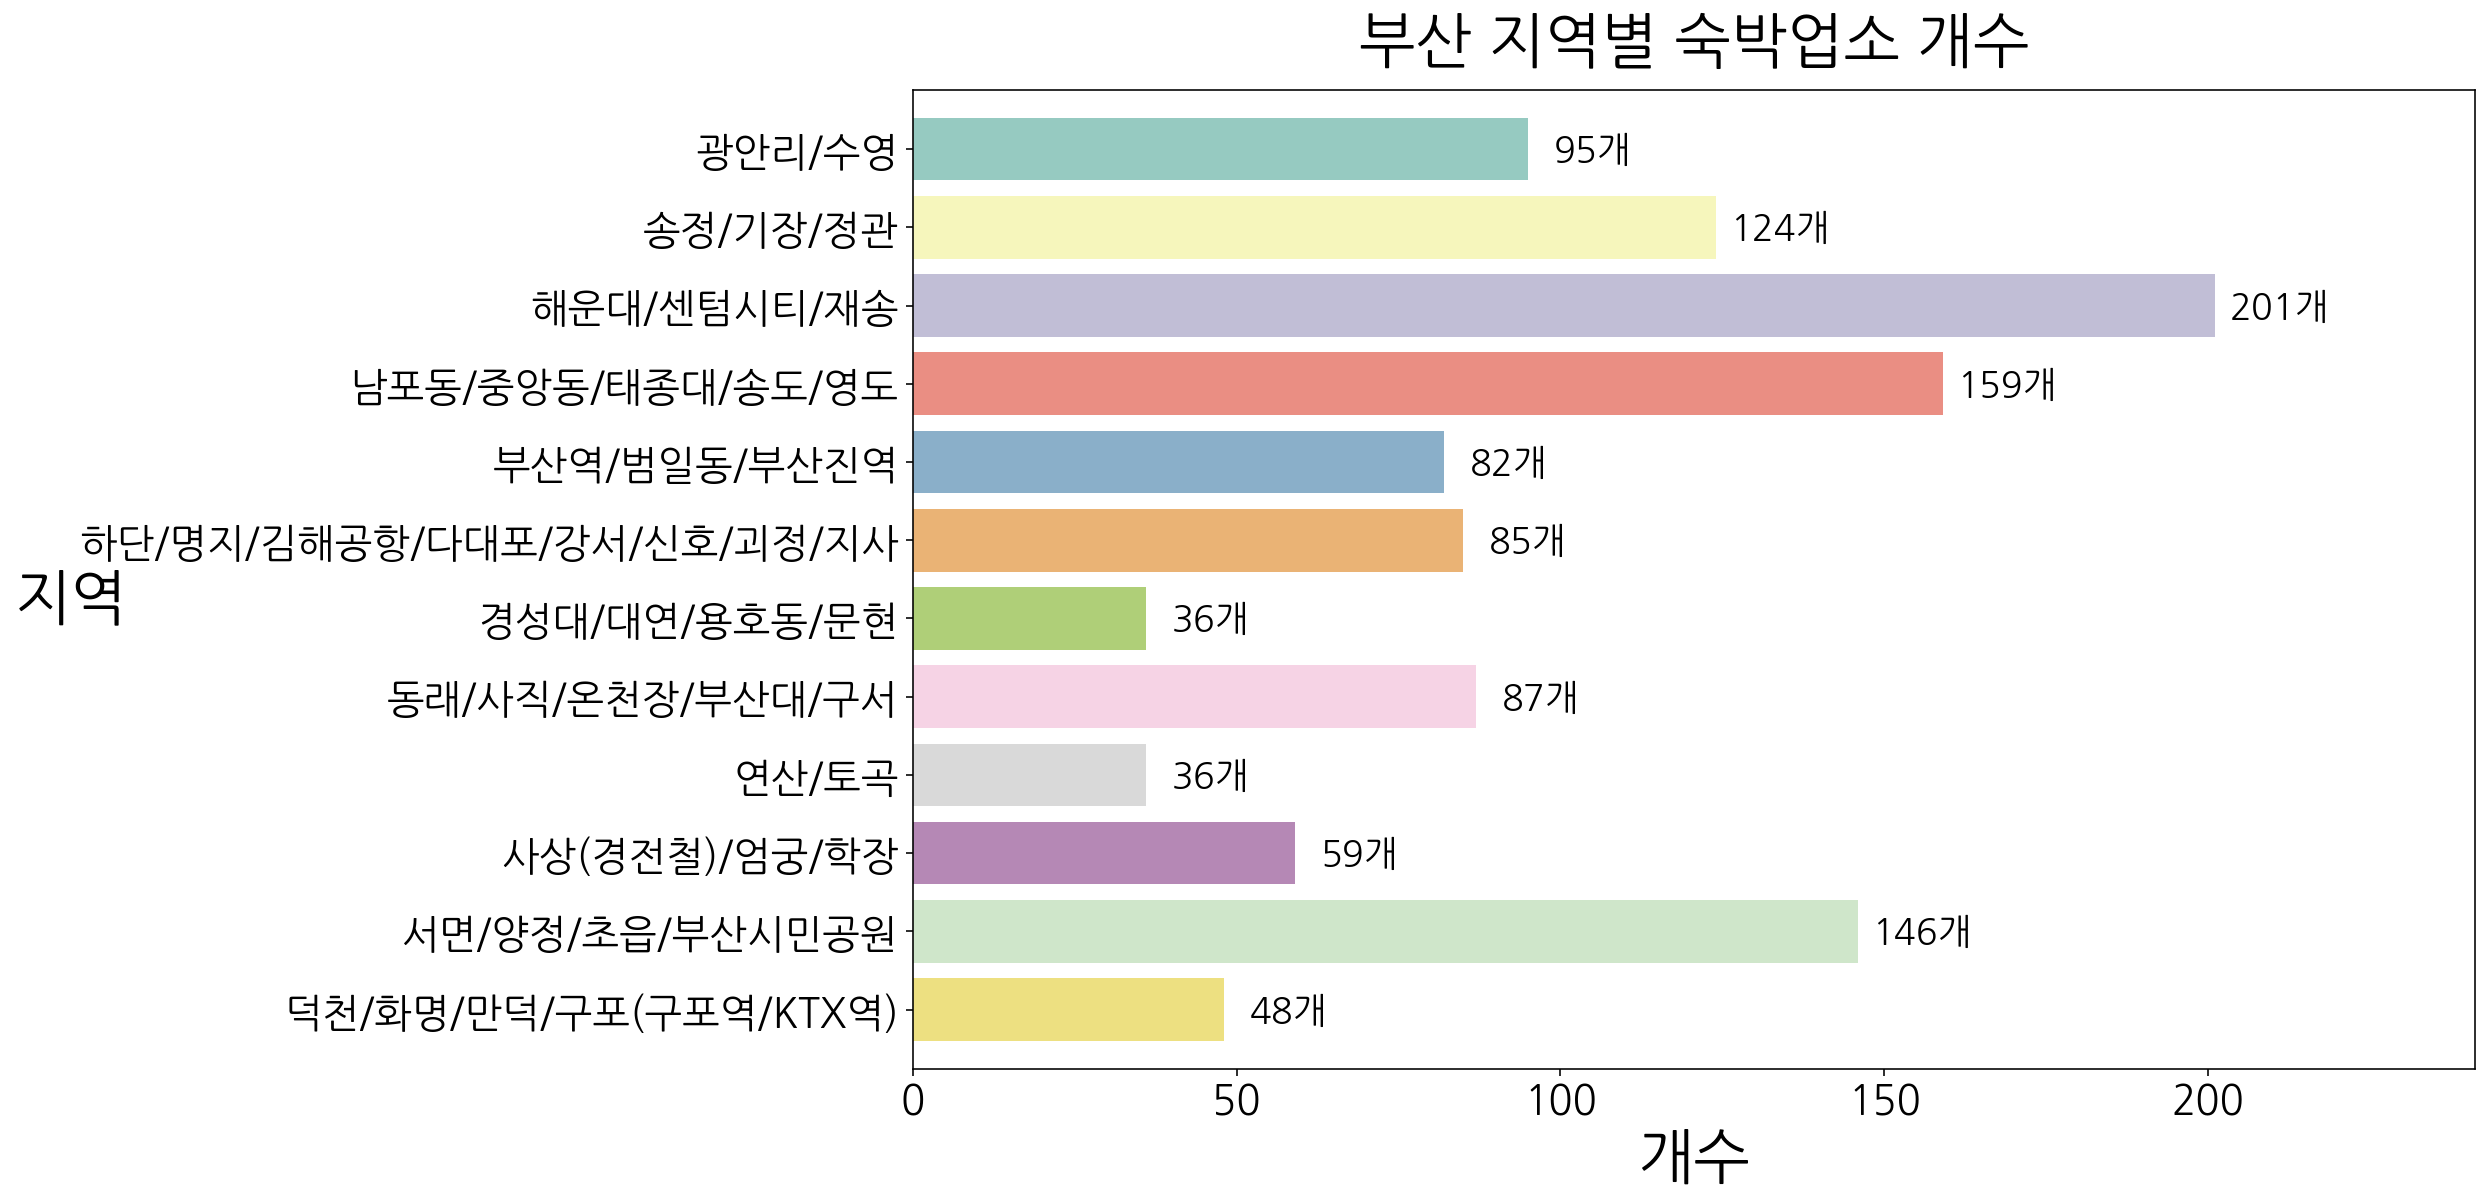

In [12]:
############## 부산 지역별 숙박업소 개수
ax = plt.figure(figsize=(14,9))
ax = sns.barplot(data = df2, x='count', y = 'loc2',palette='Set3')
ax.set_title('부산 지역별 숙박업소 개수',
            pad=15.0)
ax.set_xlabel('개수')
ax.set_ylabel('지역',rotation=0,position=(0,0.45,0))
for p in ax.patches:
    ax.annotate(f'\n{int(p.get_width())}개', (p.get_width()+10,p.get_y()-0.3), ha='center', va='top', color='black', size=18)
plt.margins(0.2, 0.03)
#plt.show()
plt.savefig('부산 지역별 숙박업소 개수.png',bbox_inches='tight', pad_inches=0.5) 

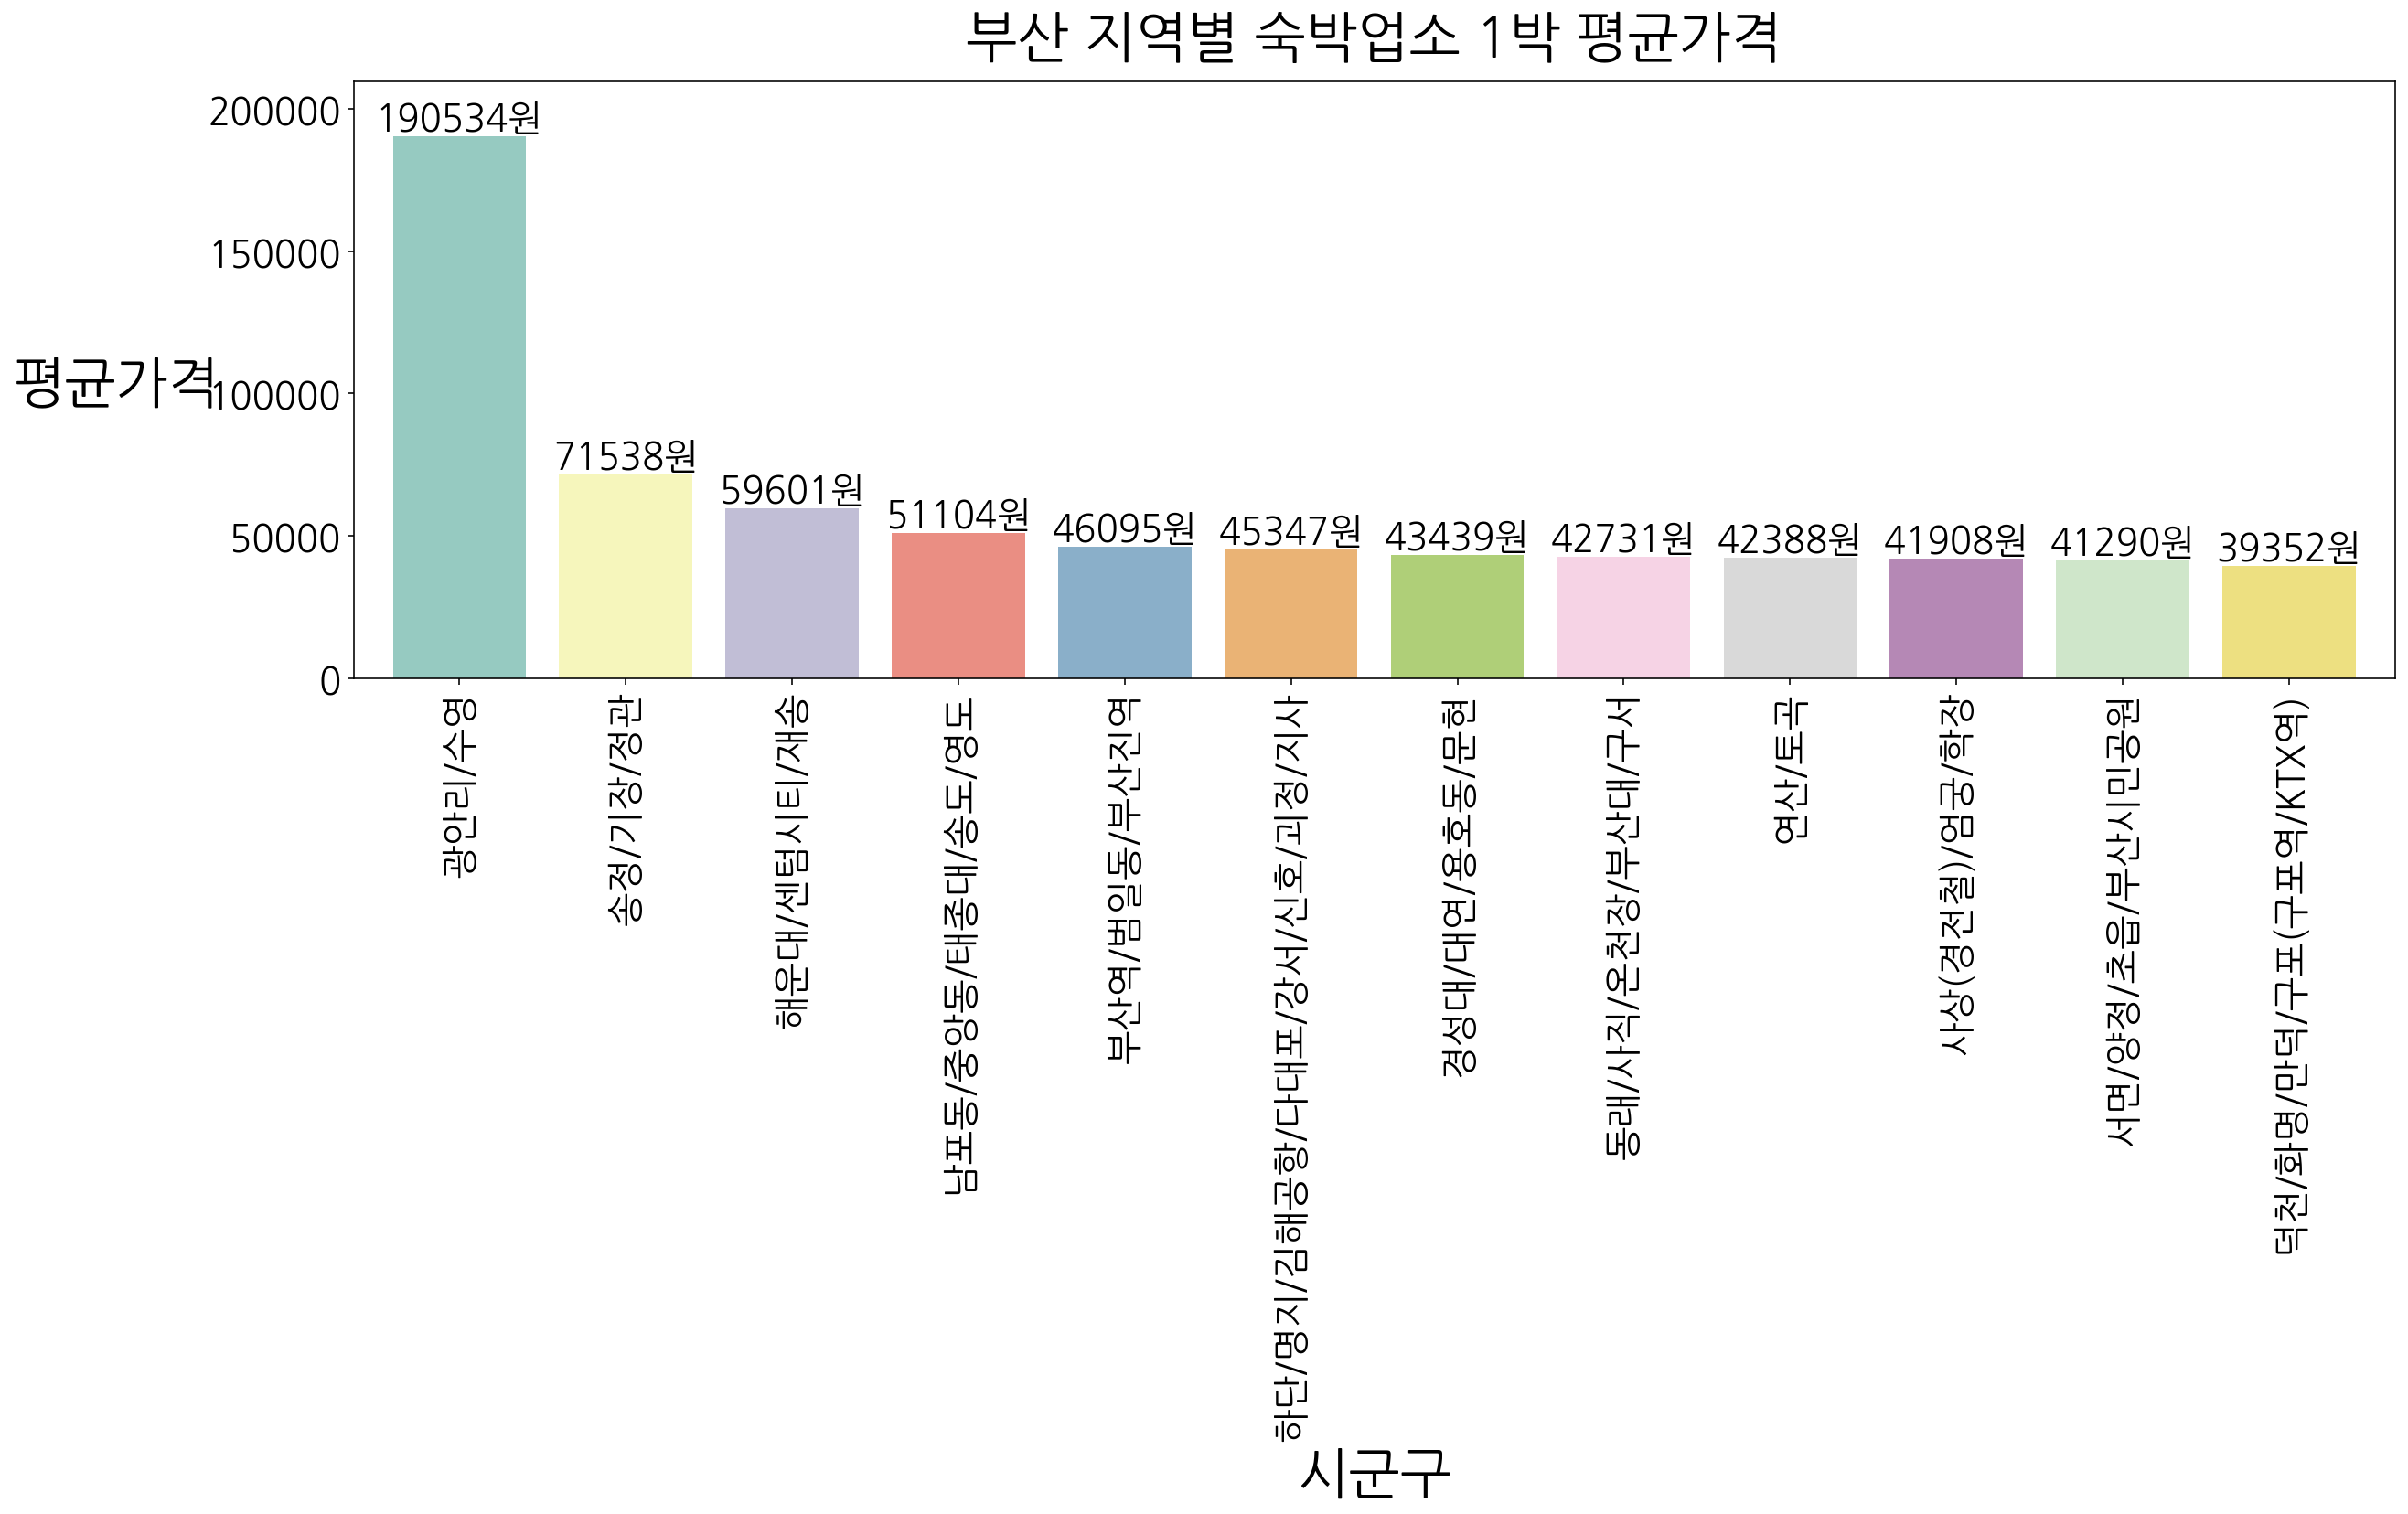

In [13]:
############## 부산 지역별 평균숙박업소 가격 그래프
########## 모든 업소의 최저가격을 가지고 추산한 것임으로 종합 가격 평균은 아님.
ax = plt.figure(figsize=(20,6))
ax = sns.barplot(data = df2, x='loc2', y = 'lowest_price',palette='Set3')
ax.set_title('부산 지역별 숙박업소 1박 평균가격',
            pad=15.0)
ax.set_xlabel('시군구')
ax.set_ylabel('평균가격',rotation=0,labelpad=50,position=(0,0.45,0))
for i in range(len(df2)):
    plt.text(i,round(df2.iloc[i][2]),str(round(df2.iloc[i][2]))+'원',fontsize=20,color='black',
             horizontalalignment='center',
             verticalalignment='bottom')
plt.xticks(rotation=90)
plt.margins(0.02, 0.1)
#plt.show()
plt.savefig('부산 지역별 숙박업소 1박 평균가격.png',bbox_inches='tight', pad_inches=0.5) 

In [14]:
df2

,loc2,score,lowest_price,SIG_CD,count
0,광안리/수영,4.472632,190533.621053,26500,95
1,송정/기장/정관,4.484677,71538.161290,26710,124
2,해운대/센텀시티/재송,4.408458,59601.343284,26350,201
3,남포동/중앙동/태종대/송도/영도,4.346541,51103.949686,26110,159
4,부산역/범일동/부산진역,4.273171,46094.573171,26170,82
5,하단/명지/김해공항/다대포/강서/신호/괴정/지사,4.624706,45347.388235,26380,85
6,경성대/대연/용호동/문현,4.475000,43438.722222,26290,36
7,동래/사직/온천장/부산대/구서,4.485057,42730.655172,26260,87
8,연산/토곡,4.594444,42388.472222,26470,36
9,사상(경전철)/엄궁/학장,4.581356,41908.169492,26530,59


In [38]:
m = folium.Map(location=[34.8, 128.6],zoom_start=8
            )
state_geo = 'final.zip.geojson'
state_geo2 = json.load(open(state_geo,encoding='utf8'))
folium.Choropleth(geo_data=state_geo2,data=df2,columns=('SIG_CD','lowest_price'),
                              key_on='feature.properties.SIG_CD',fill_color='YlOrRd',legend_name='평균 가격').add_to(m)
folium.Marker([35.15758115233297, 129.11907645237355],tooltip = df2['loc2'][0]+' : '+str(int(df2['lowest_price'][0]))+'원').add_to(m)
folium.Marker([35.28334695794302, 129.20801921411693],tooltip = df2['loc2'][1]+' : '+str(int(df2['lowest_price'][1]))+'원').add_to(m)
folium.Marker([35.19500115001736, 129.16604453162353],tooltip = df2['loc2'][2]+' : '+str(int(df2['lowest_price'][2]))+'원').add_to(m)
folium.Marker([35.09727904768774, 129.01100761103025],tooltip = df2['loc2'][3]+' : '+str(int(df2['lowest_price'][3]))+'원').add_to(m)
folium.Marker([35.11574423077448, 129.04169912166262],tooltip = df2['loc2'][4]+' : '+str(int(df2['lowest_price'][4]))+'원').add_to(m)
folium.Marker([35.17355767742534, 128.94617605605544],tooltip = df2['loc2'][5]+' : '+str(int(df2['lowest_price'][5]))+'원').add_to(m)
folium.Marker([35.14019381146711, 129.09774686441713],tooltip = df2['loc2'][6]+' : '+str(int(df2['lowest_price'][6]))+'원').add_to(m)
folium.Marker([35.20398866182396, 129.08222470516017],tooltip = df2['loc2'][7]+' : '+str(int(df2['lowest_price'][7]))+'원').add_to(m)
folium.Marker([35.17590050983166, 129.08989591769958],tooltip = df2['loc2'][8]+' : '+str(int(df2['lowest_price'][8]))+'원').add_to(m)
folium.Marker([35.13862927725158, 128.99528363417664],tooltip = df2['loc2'][9]+' : '+str(int(df2['lowest_price'][9]))+'원').add_to(m)
folium.Marker([35.15737998319468, 129.05696832789425],tooltip = df2['loc2'][10]+' : '+str(int(df2['lowest_price'][10]))+'원').add_to(m)
folium.Marker([35.21808623503303, 129.03465121439805],tooltip = df2['loc2'][11]+' : '+str(int(df2['lowest_price'][11]))+'원').add_to(m)
m

In [39]:
m.save('부산 숙밥업소 1박 평균가격.html')

In [40]:
#### 시군구별 숙박업소 개수
m = folium.Map(location=[36.8, 127.6],zoom_start=8)
state_geo = 'final.zip.geojson'
state_geo2 = json.load(open(state_geo,encoding='utf8'))
folium.Choropleth(geo_data=state_geo2,data=df2,columns=('SIG_CD','count'),
                              key_on='feature.properties.SIG_CD',fill_color='YlOrRd',legend_name='숙박업소 개수').add_to(m)
folium.Marker([35.15758115233297, 129.11907645237355],tooltip = df2['loc2'][0]+' : '+str(int(df2['count'][0]))+'개').add_to(m)
folium.Marker([35.28334695794302, 129.20801921411693],tooltip = df2['loc2'][1]+' : '+str(int(df2['count'][1]))+'개').add_to(m)
folium.Marker([35.19500115001736, 129.16604453162353],tooltip = df2['loc2'][2]+' : '+str(int(df2['count'][2]))+'개').add_to(m)
folium.Marker([35.09727904768774, 129.01100761103025],tooltip = df2['loc2'][3]+' : '+str(int(df2['count'][3]))+'개').add_to(m)
folium.Marker([35.11574423077448, 129.04169912166262],tooltip = df2['loc2'][4]+' : '+str(int(df2['count'][4]))+'개').add_to(m)
folium.Marker([35.17355767742534, 128.94617605605544],tooltip = df2['loc2'][5]+' : '+str(int(df2['count'][5]))+'개').add_to(m)
folium.Marker([35.14019381146711, 129.09774686441713],tooltip = df2['loc2'][6]+' : '+str(int(df2['count'][6]))+'개').add_to(m)
folium.Marker([35.20398866182396, 129.08222470516017],tooltip = df2['loc2'][7]+' : '+str(int(df2['count'][7]))+'개').add_to(m)
folium.Marker([35.17590050983166, 129.08989591769958],tooltip = df2['loc2'][8]+' : '+str(int(df2['count'][8]))+'개').add_to(m)
folium.Marker([35.13862927725158, 128.99528363417664],tooltip = df2['loc2'][9]+' : '+str(int(df2['count'][9]))+'개').add_to(m)
folium.Marker([35.15737998319468, 129.05696832789425],tooltip = df2['loc2'][10]+' : '+str(int(df2['count'][10]))+'개').add_to(m)
folium.Marker([35.21808623503303, 129.03465121439805],tooltip = df2['loc2'][11]+' : '+str(int(df2['count'][11]))+'개').add_to(m)


m
### 색상 https://dailyheumsi.tistory.com/m/144?category=854906

In [41]:
m.save('부산 숙밥업소 수.html')